# **Exploratory Data Analysis**

### About the company: 
- The olist is the ideal solution for those who want to sell professionally and effectively in e-commerce. They help those who want to sell, find those who want to buy, who have thousands of partner retailers and have already sold products to millions of people across Brazil. 
- The company has grown to help more than 12,000 merchants run their businesses with a team of more than 300 Olisters.
- Olist operates an online e-commerce site for sellers, that connects merchants and their products to main marketplaces.
- Olist connects small businesses from all over Brazil to channels without hassle and with a single contract. Those merchants are able to sell their products through the Olist Store and ship them directly to the customers using Olist logistics partners.
- After a customer purchases the product from Olist Store a seller gets notified to fulfill that order. Once the customer receives the product, or the estimated delivery date is due, the customer gets a satisfaction survey by email where he can give a note for the purchase experience and write down some comments.

### About the Dataset:
- This is a Brazilian ecommerce public dataset of orders made at Olist Store. The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. 
- Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers. We also released a geolocation dataset that relates Brazilian zip codes to lat/lng coordinates.
- This is real commercial data, it has been anonymised, and references to the companies and partners in the review text have been replaced with the names of Game of Thrones great houses.
### Attention
1. An order might have multiple items.
2. Each item might be fulfilled by a distinct seller.
3. All text identifying stores and partners where replaced by the names of Game of Thrones great houses.


![Data schema](https://i.imgur.com/HRhd2Y0.png)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set_style('darkgrid')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
olist_customer = pd.read_csv('/content/drive/MyDrive/olist_customers_dataset.csv')
olist_geolocation = pd.read_csv('/content/drive/MyDrive/olist_geolocation_dataset.csv')
olist_orders = pd.read_csv('/content/drive/MyDrive/olist_orders_dataset.csv')
olist_order_items = pd.read_csv('/content/drive/MyDrive/olist_order_items_dataset.csv')
olist_order_payments = pd.read_csv('/content/drive/MyDrive/olist_order_payments_dataset.csv')
olist_order_reviews = pd.read_csv('/content/drive/MyDrive/olist_order_reviews_dataset.csv')
olist_products = pd.read_csv('/content/drive/MyDrive/olist_products_dataset.csv')
olist_sellers = pd.read_csv('/content/drive/MyDrive/olist_sellers_dataset.csv')

In [4]:
olist_products_translation = pd.read_csv('/content/drive/MyDrive/product_category_name_translation.csv')

In [5]:
datasets = [olist_customer, olist_geolocation, olist_orders, olist_order_items, olist_order_payments,
            olist_order_reviews, olist_products, olist_sellers]
names = ['olist_customer', 'olist_geolocation', 'olist_orders', 'olist_order_items', 'olist_order_payments',
         'olist_order_reviews', 'olist_products', 'olist_sellers']

# Creating a DataFrame with useful information about all datasets
data_info = pd.DataFrame()
data_info['dataset'] = names
data_info['n_rows'] = [df.shape[0] for df in datasets]
data_info['n_cols'] = [df.shape[1] for df in datasets]
data_info['total_null'] = [df.isnull().sum().sum() for df in datasets]
data_info['qty_null_columns'] = [len([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]
data_info['null_columns'] = [', '.join([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]

data_info.style.background_gradient()

,dataset,n_rows,n_cols,total_null,qty_null_columns,null_columns
0,olist_customer,99441,5,0,0,
1,olist_geolocation,1000163,5,0,0,
2,olist_orders,99441,8,4908,3,"order_approved_at, order_delivered_carrier_date, order_delivered_customer_date"
3,olist_order_items,112650,7,0,0,
4,olist_order_payments,103886,5,0,0,
5,olist_order_reviews,100000,7,146532,2,"review_comment_title, review_comment_message"
6,olist_products,32951,9,2448,8,"product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm"
7,olist_sellers,3095,4,0,0,


#### **Observations**
- The datasets has null values in three files - orders,reviews and products.

## **Customers Dataset**
- This dataset has information about the customer and its location. Used to identify unique customers in the orders dataset and to find the orders delivery location.
- Each order is assigned to a unique customerid. This means that the same customer will get different ids for different orders. The purpose of having a customerunique_id on the dataset is to allow you to identify customers that made repurchases at the store. Otherwise you would find that each order had a different customer associated with.

In [6]:
olist_customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [7]:
olist_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


#### Observations
* There are no null values in the customers dataset
* This Dataset has three object type columns and one numerical type column.

In [8]:
olist_customer.describe(include=np.object)

,customer_id,customer_unique_id,customer_city,customer_state
count,99441,99441,99441,99441
unique,99441,96096,4119,27
top,7534c433c432943e5dfe580148176282,8d50f5eadf50201ccdcedfb9e2ac8455,sao paulo,SP
freq,1,17,15540,41746


#### Observations
* There are 99441 unique customer_ids and each order has unique customer_id.
* Customer_unique_id has a total count of 99441,out of these **96096** are unique and most common customer id is `8d50f5eadf50201ccdcedfb9e2ac8455` with the frequency of 17.
* Customer_city has total count of 99441 and it has **4119 unique cities**,most of the purchase occurs at sao paulo with a frequency of 15540,in others words there are more customers are from sao paulo.
* Customer_state has **27 unique states** and the state SP tops the list with a frequency of 41746.
- **SP** - here stands for Sao paulo state and its understood that its the state for the city sao paulo.
- **São Paulo** is the richest and most populous state of Brazil, ranking 16th and 27th worldwide, respectively. It is the foremost industrial centre in Latin America. No wonder, most of the purchases are from this state. **Rio de janeiro** be the second richest in the country.

## **Analysis on customerid** 

In [9]:
olist_customer['customer_id'].nunique()

99441

Each order is assigned to a unique customer_id. The means that the same customer will get different ids for different orders

## **Analysis on customer_unique_id**

In [10]:
# One time shoppers
olist_customer['customer_unique_id'].value_counts()[olist_customer['customer_unique_id'].value_counts() == 1].value_counts()

1    93099
Name: customer_unique_id, dtype: int64

In [11]:
# Number of users shopped more than once
olist_customer['customer_unique_id'].nunique() - 93099

2997

In [12]:
olist_customer['customer_unique_id'].value_counts().head(2997)

8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
6469f99c1f9dfae7733b25662e7f1782     7
1b6c7548a2a1f9037c1fd3ddfed95f33     7
ca77025e7201e3b30c44b472ff346268     7
                                    ..
2b9bd15bf8e54b231c518790c55e5f92     2
25c88b7eff936d6a6fed64142b760035     2
827b19392982299876c0aca1f92208c2     2
4011b7579e894fa929d2de97b4928f41     2
52abba659c0a219f8de7076dc33e0e83     2
Name: customer_unique_id, Length: 2997, dtype: int64

In [13]:
# shopper who has purchased more than 10 times.
olist_customer['customer_unique_id'].value_counts()[olist_customer['customer_unique_id'].value_counts() > 10].value_counts()

17    1
Name: customer_unique_id, dtype: int64

In [14]:
# shopper who has purchased more than 5 times.
olist_customer['customer_unique_id'].value_counts()[olist_customer['customer_unique_id'].value_counts() > 5].value_counts()

6     6
7     3
9     1
17    1
Name: customer_unique_id, dtype: int64

In [15]:
# shoppers who has purchased only twice.
olist_customer['customer_unique_id'].value_counts()[olist_customer['customer_unique_id'].value_counts() == 2].value_counts()

2    2745
Name: customer_unique_id, dtype: int64

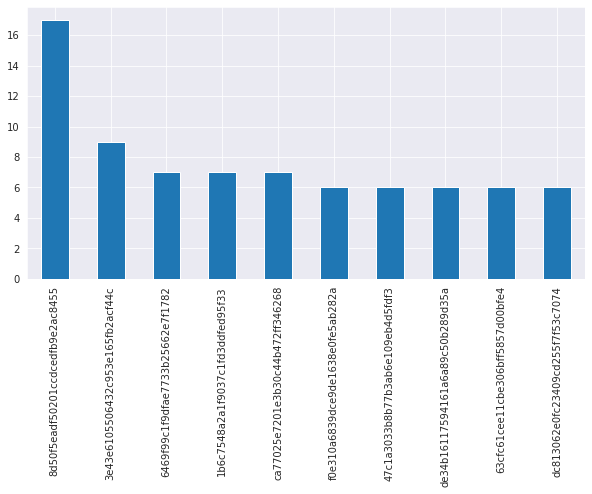

In [16]:
## selecting top 10 customers who shopped more
plt.figure(figsize=(10,5))
olist_customer['customer_unique_id'].value_counts().head(10).plot(kind='bar')
plt.show()

#### **Observations**
* The purchase frequency of top 10 customers in the year 2016 to 2018 ranges from 17 to 6.
* There are only 2997 customers who shopped more than once.
* There are 93099 one time shoppers.
* Only 1 shopper has purchased more than 10 times.
* There are 11 shoppers who purchased more than 5 times.
* There are 2745 customers who purchased only twice.

## **Analysis on customer-city**

In [17]:
olist_customer['customer_city'].value_counts()

sao paulo                     15540
rio de janeiro                 6882
belo horizonte                 2773
brasilia                       2131
curitiba                       1521
                              ...  
pindoretama                       1
alegrete do piaui                 1
amontada                          1
nova independencia                1
santo antonio do aracangua        1
Name: customer_city, Length: 4119, dtype: int64

In [18]:
# Number of cities where shopping is done only once.
olist_customer['customer_city'].value_counts()[olist_customer['customer_city'].value_counts() == 1].count()

1144

In [19]:
4119 - 1144

2975

In [20]:
olist_customer['customer_city'].value_counts().head(2975)

sao paulo               15540
rio de janeiro           6882
belo horizonte           2773
brasilia                 2131
curitiba                 1521
                        ...  
alto caparao                2
cumaru                      2
alianca do tocantins        2
guaratinga                  2
santa teresinha             2
Name: customer_city, Length: 2975, dtype: int64

In [21]:
olist_customer['customer_city'].nunique()

4119

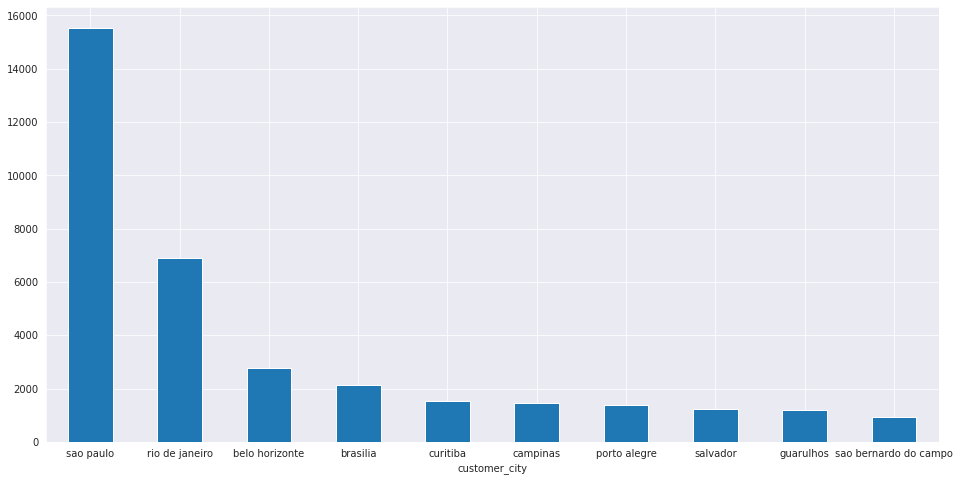

In [22]:
c = olist_customer.groupby('customer_city')['customer_id'].nunique().sort_values(ascending=False)
c1 = c.head(10)
plt.figure(figsize=(16,8))
c1.plot(kind='bar',rot=0)
plt.show()

In [23]:
## Total customers from the top 10 cities
c1.sum()

35042

In [24]:
print('Top 10 cities covers',round(c1.sum()/olist_customer.shape[0]*100,1),'percentage of all the orders')

Top 10 cities covers 35.2 percentage of all the orders


#### **Observations**
* Sao paulo,rio de janeiro and belo horizonte are the top 3 cities which has more customers.
* A total of 35042 customers are from the top 10 shopping cities.
* There are 1144 cities where shopping is done only once.
* Top 10 cities covers 35.2 percentage of all the orders

## **Analysis on customer-state**

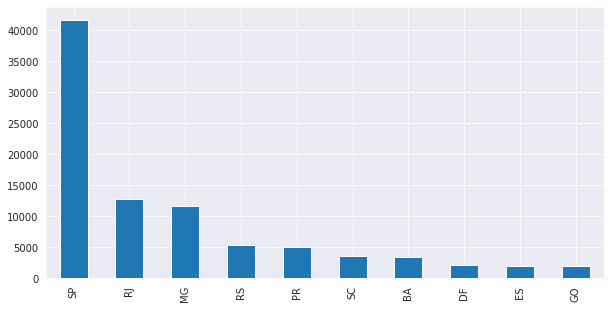

In [25]:
## Top-10 customer states
plt.figure(figsize=(10,5))
olist_customer['customer_state'].value_counts().head(10).plot(kind='bar')
plt.show()

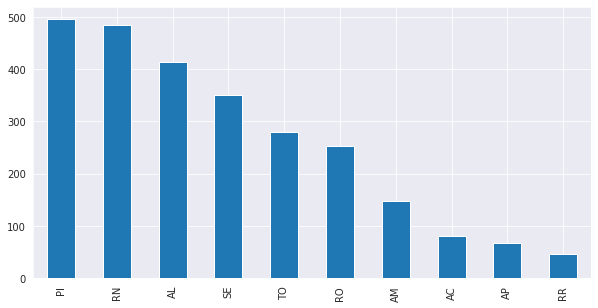

In [26]:
## Bottom-10 customer states
plt.figure(figsize=(10,5))
olist_customer['customer_state'].value_counts().tail(10).plot(kind='bar')
plt.show()

#### **Observations**
* More customers shop from the states SP, RJ, MG, whereas the number of shoppers from AC, AP, RR are the least.

## **Analysis on Zipcode**

In [27]:
## customer_zipcode
olist_customer['customer_zip_code_prefix'].value_counts()

22790    142
24220    124
22793    121
24230    117
22775    110
        ... 
59820      1
47590      1
56313      1
44023      1
39113      1
Name: customer_zip_code_prefix, Length: 14994, dtype: int64

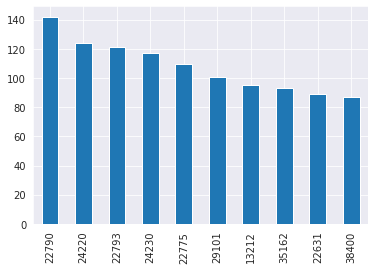

In [28]:
olist_customer['customer_zip_code_prefix'].value_counts().head(10).plot(kind='bar')
plt.show()

In [29]:
zips = olist_customer.groupby('customer_zip_code_prefix')['customer_id'].nunique().sort_values(ascending=False)
print("Products were delivered most frequently,",zips.iloc[0],"times, to the", zips.index[0], "zip code.")

Products were delivered most frequently, 142 times, to the 22790 zip code.


## **Merging files** 

In [30]:
## Joining orders, payments and customers,items,products,category
ord_pay = pd.merge(olist_orders,olist_order_payments,on='order_id')
ord_pay = ord_pay.merge(olist_customer,on='customer_id')
ord_pay = ord_pay.merge(olist_order_items,on='order_id')
ord_pay = ord_pay.merge(olist_products,on='product_id')
ord_pay = ord_pay.merge(olist_products_translation,on='product_category_name')
ord_pay = ord_pay.merge(olist_sellers,on='seller_id')

In [31]:
pd.set_option('display.max_columns',None)
ord_pay.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,credit_card,3,37.77,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,credit_card,1,37.77,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP


In [32]:
ord_pay.drop(columns='product_category_name',inplace=True)

In [33]:
## checking for missing values
missing = ord_pay.isnull().sum()/ord_pay.shape[0] * 100
missing[missing > 0]

order_approved_at                0.012082
order_delivered_carrier_date     1.039887
order_delivered_customer_date    2.153127
product_weight_g                 0.000863
product_length_cm                0.000863
product_height_cm                0.000863
product_width_cm                 0.000863
dtype: float64

#### **Observations**
* Missing values in the dataset are less than 3 percentage.

In [34]:
ord_pay['order_purchase_timestamp'] = pd.to_datetime(ord_pay['order_purchase_timestamp'])
ord_pay['order_approved_at'] = pd.to_datetime(ord_pay['order_approved_at'])
ord_pay['order_delivered_carrier_date'] = pd.to_datetime(ord_pay['order_delivered_carrier_date'])
ord_pay['order_delivered_customer_date'] = pd.to_datetime(ord_pay['order_delivered_customer_date'])
ord_pay['order_estimated_delivery_date'] = pd.to_datetime(ord_pay['order_estimated_delivery_date'])

In [35]:
subset = list(olist_orders.columns)
subset_1 = ord_pay[subset]

## **Analysis on order status**

In [36]:
subset_1['order_status'].value_counts(normalize=True)

delivered      0.978477
shipped        0.010477
canceled       0.004738
processing     0.003124
invoiced       0.003098
unavailable    0.000060
approved       0.000026
Name: order_status, dtype: float64

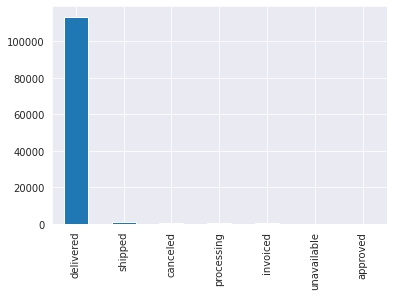

In [37]:
subset_1['order_status'].value_counts().plot(kind='bar')
plt.show()

#### **Observations**
* 97% of the total orders have been delivered and 1% of the total orders are shipped.

In [38]:
## How many purchases were made in year,month and day
subset_1.insert(loc=3,column='purchase_year',value=subset_1.order_purchase_timestamp.dt.year)
subset_1.insert(loc=4,column='purchase_month',value=subset_1.order_purchase_timestamp.dt.month_name())
subset_1.insert(loc=5,column='purchase_day',value=subset_1.order_purchase_timestamp.dt.day)

In [39]:
subset_1.head()

,order_id,customer_id,order_status,purchase_year,purchase_month,purchase_day,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017,October,2,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017,October,2,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017,October,2,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017,August,15,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017,August,2,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15


## **Analysis on purchase year**

In [40]:
subset_1['purchase_year'].value_counts()

2018    62938
2017    52557
2016      383
Name: purchase_year, dtype: int64

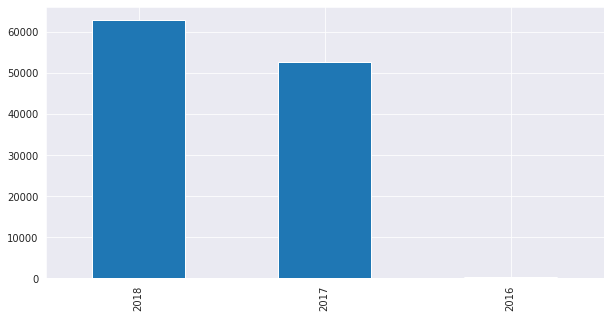

In [41]:
plt.figure(figsize=(10,5))
a = subset_1['purchase_year'].value_counts()
a.plot(kind='bar')
plt.show()

#### **Observations**
* The purchases are way more higher in the year 2018 compared to rest of the years.
* A total count of 62938 purchases were made in the year 2018 and 52557 purchases in the year 2017.
* It is interesting to see that only 383 purchases were made in the year 2016 and the next two consecutive years the purchases increased drastically.
* With this information we can cleary see that E-commerce market in brazil is growing.

## **Estiamating the Lead Time**
* Lead Time is basically time between placing an order and receiving it

In [42]:
subset_1['lead'] = (subset_1['order_delivered_customer_date'] - subset_1['order_purchase_timestamp']).dt.days
subset_1.head(3)

,order_id,customer_id,order_status,purchase_year,purchase_month,purchase_day,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,lead
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017,October,2,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017,October,2,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017,October,2,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0


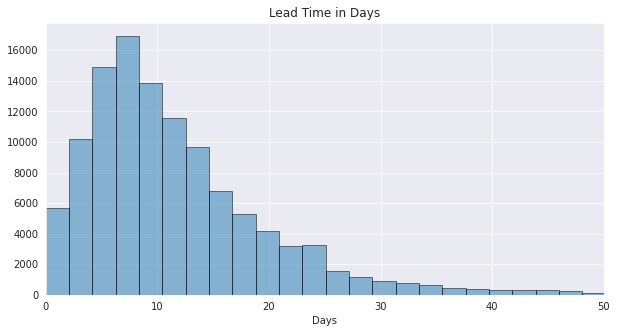

In [43]:
plt.figure(figsize=(10,5))
plt.hist(subset_1['lead'],bins=100,alpha=0.5,edgecolor='black')
plt.title('Lead Time in Days')
plt.xlabel('Days')
plt.xlim((0,50))
plt.show()

#### **Observations**
* From the above plot we can infer that 50% of the orders get delivered within 10 days which is a good sign for the business.
* Few orders takes more than 20 days to deliver to the customer.

## **Back order rate**

- The Backorder Rate KPI measures how many orders cannot be filled at the time a customer places them. This is measured by frequency of orders delivered later than the  the estimated delivery date.

In [44]:
subset_1['back_order'] = (subset_1['order_delivered_customer_date'] - subset_1['order_estimated_delivery_date']).dt.days
back_order_rate = subset_1[subset_1['back_order'] > 0]

In [45]:
back_order_rate.head(3)

,order_id,customer_id,order_status,purchase_year,purchase_month,purchase_day,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,lead,back_order
58,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,delivered,2017,November,24,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-13 21:14:05,2017-12-28 18:59:23,2017-12-21,33.0,7.0
75,d2ce7421730f81ac57551e623ed3522d,873967bfecc663740e5d43930cc64b7b,delivered,2017,April,25,2017-04-25 16:48:35,2017-04-25 16:55:23,2017-04-27 10:00:13,2017-05-17 10:18:51,2017-05-16,21.0,1.0
111,c49be9a11fd13933307cc6a19b03a895,a972623b3481cbfd95fa776b0067e554,delivered,2018,May,15,2018-05-15 18:54:39,2018-05-17 03:16:13,2018-05-17 13:51:00,2018-06-06 13:27:44,2018-05-30,21.0,7.0


In [46]:
orders_delayed = back_order_rate.order_id.nunique()
total_number_of_customers_orders_shipped = ord_pay.order_status.value_counts()[0]

In [47]:
back_order = orders_delayed/total_number_of_customers_orders_shipped * 100
back_order

5.678049813024765

## **Observations**

* Nearly 5.68% of the products went on backorder

## **Analysis on Payments**

In [48]:
olist_order_payments.head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


In [49]:
olist_order_payments['payment_type'].value_counts(normalize=True)

credit_card    0.739224
boleto         0.190440
voucher        0.055590
debit_card     0.014718
not_defined    0.000029
Name: payment_type, dtype: float64

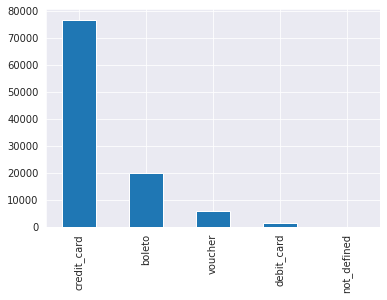

In [50]:
olist_order_payments['payment_type'].value_counts().plot(kind='bar')
plt.show()

#### **Observations**
* Nearly 74% of the payments have been done by credit_card and boleto has 20% of the payments.

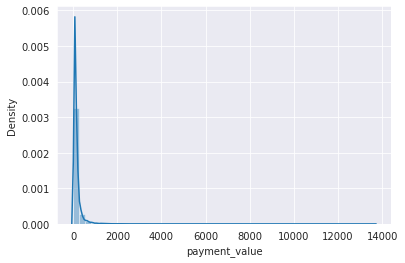

In [51]:
sns.distplot(olist_order_payments['payment_value'])
plt.show()

In [52]:
##Top-five payment_sequential
olist_order_payments['payment_sequential'].value_counts(normalize=True).nlargest()

1    0.956433
2    0.029253
3    0.005593
4    0.002676
5    0.001636
Name: payment_sequential, dtype: float64

#### **Observations**
* Payment value is right-skewed, which is not good for a business. 
* A customer may pay an order with more than one payment method. if the customer does so, sequence will be created.
* Nearly 95.64 % of the customers are paying by only one method.

In [53]:
##order_id vs payment
olist_order_payments.groupby('order_id')['payment_value'].sum().nlargest()

order_id
03caa2c082116e1d31e67e9ae3700499    13664.08
736e1922ae60d0d6a89247b851902527     7274.88
0812eb902a67711a1cb742b3cdaa65ae     6929.31
fefacc66af859508bf1a7934eab1e97f     6922.21
f5136e38d1a14a4dbd87dff67da82701     6726.66
Name: payment_value, dtype: float64

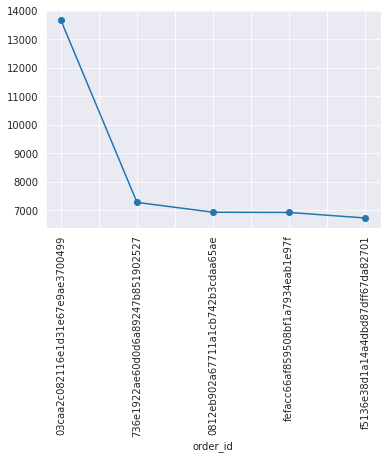

In [54]:
olist_order_payments.groupby('order_id')['payment_value'].sum().nlargest().plot(kind='line',marker="o")
plt.xticks(rotation=90)
plt.show()

#### **Observations**
- At the max, an order with high payment values of 13664 is observed.

## **Analysis on Products**

In [55]:
a = list(olist_products.columns)
a[1] = 'product_category_name_english'
product = ord_pay[a]

In [56]:
product.head(3)

,product_id,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,87285b34884572647811a353c7ac498a,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,87285b34884572647811a353c7ac498a,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,87285b34884572647811a353c7ac498a,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0


In [57]:
product.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,115878.000000,115878.000000,115878.000000,115877.000000,115877.000000,115877.000000,115877.000000
mean,48.766116,786.956428,2.207727,2117.594190,30.311554,16.656886,23.110445
std,10.035366,653.071898,1.719519,3785.744297,16.225837,13.480721,11.758209
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,347.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,52.000000,601.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,985.000000,3.000000,1800.000000,38.000000,20.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


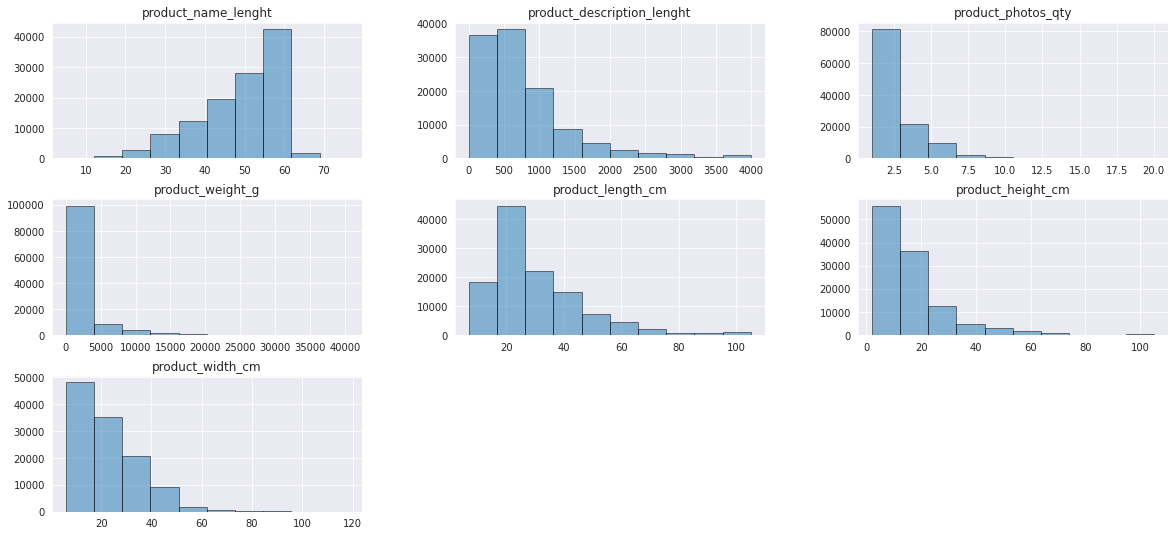

In [58]:
product.hist(figsize=(20,9),alpha=0.5,edgecolor='black')
plt.show()

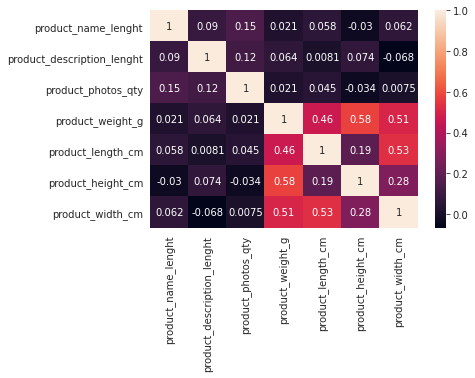

In [59]:
a = product.select_dtypes(exclude=np.object)
sns.heatmap(a.corr(),annot=True)
plt.show()


#### **Observations**
* From the above histograms we can infer that the distributions of product_weight,product_length,product_height,product_width are right-skewed.
* Product_name,description,photos are not that much useful in predicting the price.

## **Analysis on Sellers**

In [60]:
olist_sellers.head(3)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ


In [61]:
c = olist_sellers['seller_id'].nunique()
print('There are {} unique sellers'.format(c))

There are 3095 unique sellers


In [62]:
##seller_zip_code_prefix
d = olist_sellers['seller_zip_code_prefix'].nunique()
print('There are {} unique seller_zip_code'.format(d))

There are 2246 unique seller_zip_code


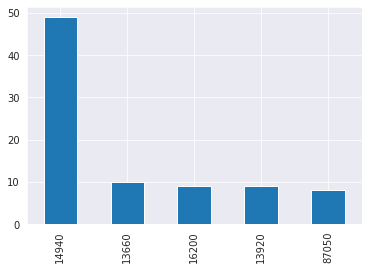

In [63]:
olist_sellers['seller_zip_code_prefix'].value_counts().nlargest().plot(kind='bar')
plt.show()

In [64]:
zips = olist_sellers.groupby('seller_zip_code_prefix')['seller_id'].nunique().sort_values(ascending=False)
print("Products were sold most frequently,",zips.iloc[0],"times, from the", zips.index[0], "zip code.")

Products were sold most frequently, 49 times, from the 14940 zip code.


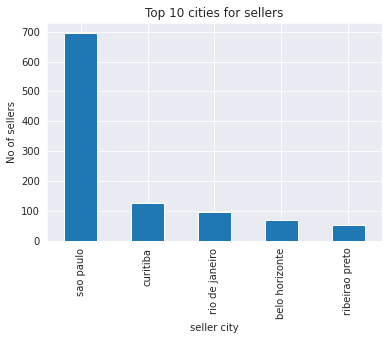

In [65]:
z = olist_sellers['seller_city'].value_counts().nlargest()
z.plot(kind='bar')
plt.title('Top 10 cities for sellers')
plt.xlabel('seller city')
plt.ylabel('No of sellers')
plt.show()


In [66]:
olist_sellers['seller_city'].value_counts(normalize=True).nlargest()

sao paulo         0.224233
curitiba          0.041034
rio de janeiro    0.031018
belo horizonte    0.021971
ribeirao preto    0.016801
Name: seller_city, dtype: float64

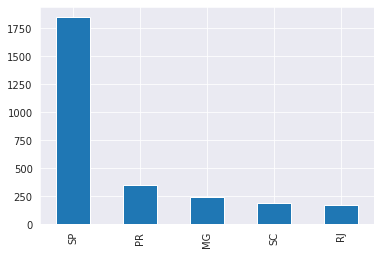

In [67]:
## Top 5 states for sellers
olist_sellers['seller_state'].value_counts().nlargest().plot(kind='bar')
plt.show()

In [68]:
olist_sellers['seller_state'].value_counts(normalize=True).nlargest()

SP    0.597415
PR    0.112763
MG    0.078837
SC    0.061389
RJ    0.055250
Name: seller_state, dtype: float64

#### **Observations**
* Nearly 22% of sellers are from sao paulo because the customers are also more in Sao paulo,we can also say majority of the business happens in the sao paulo region.
* 59% of the sellers are from the state SP.

##**Analysis on Order Items**

In [69]:
olist_order_items.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [70]:
olist_order_items['order_id'].value_counts()

8272b63d03f5f79c56e9e4120aec44ef    21
ab14fdcfbe524636d65ee38360e22ce8    20
1b15974a0141d54e36626dca3fdc731a    20
428a2f660dc84138d969ccd69a0ab6d5    15
9ef13efd6949e4573a18964dd1bbe7f5    15
                                    ..
ae35264f1f3d48dcabac5f8a4044c8fd     1
fc2010beb548588d1543ca8adaa132ba     1
3af427dfb9464cd660ac27292bb5d30b     1
115e5f8ceec805909d9cc974e1653153     1
dc28b4fe4b9aee6d106b4fdb21e6c894     1
Name: order_id, Length: 98666, dtype: int64

In [71]:
olist_order_items['product_id'].value_counts()

aca2eb7d00ea1a7b8ebd4e68314663af    527
99a4788cb24856965c36a24e339b6058    488
422879e10f46682990de24d770e7f83d    484
389d119b48cf3043d311335e499d9c6b    392
368c6c730842d78016ad823897a372db    388
                                   ... 
a126c7c571620711d095a4e8690a7240      1
266cb817d01b77ace5dc383d8cfd0540      1
6309ecb18b264afd138380fe238589f7      1
581de99ffa609d5f7b841f0d81df3f2f      1
1f32fa4223c913c075458059fde383bb      1
Name: product_id, Length: 32951, dtype: int64

In [72]:
olist_order_items['seller_id'].value_counts()

6560211a19b47992c3666cc44a7e94c0    2033
4a3ca9315b744ce9f8e9374361493884    1987
1f50f920176fa81dab994f9023523100    1931
cc419e0650a3c5ba77189a1882b7556a    1775
da8622b14eb17ae2831f4ac5b9dab84a    1551
                                    ... 
50bf89f1349bc0409a268c3a49678009       1
1c742ac33582852aaf3bcfbf5893abcf       1
7a073a40a9d3f1fee8bc45670ea1e909       1
7cf4ea70955b00d6b3c22542598e2715       1
75fdd0a732287f9497b179f6bd445d32       1
Name: seller_id, Length: 3095, dtype: int64

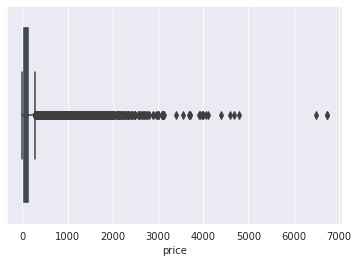

In [73]:
sns.boxplot(olist_order_items['price'])
plt.show()

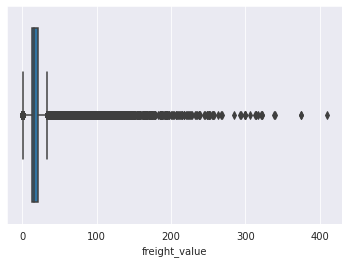

In [74]:
sns.boxplot(olist_order_items['freight_value'])
plt.show()

## **Convert the purchase data to sales data**

In [75]:
olist_orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [76]:
olist_order_items.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [77]:
purchase_date = olist_orders[['order_id','order_purchase_timestamp']]
olist_order_date = olist_order_items.merge(purchase_date,on='order_id')

In [78]:
olist_order_date['order_purchase_timestamp']=pd.to_datetime(olist_order_date['order_purchase_timestamp'])
olist_order_date['order_purchase_year'] = olist_order_date['order_purchase_timestamp'].dt.year
olist_order_date['order_purchase_month'] = olist_order_date['order_purchase_timestamp'].dt.month
olist_order_date['order_purchase_date'] = olist_order_date['order_purchase_timestamp'].dt.date
olist_order_date['order_purchase_day'] = olist_order_date['order_purchase_timestamp'].dt.day
olist_order_date['order_purchase_week'] = olist_order_date['order_purchase_timestamp'].dt.week
olist_order_date['order_purchase_hour'] = olist_order_date['order_purchase_timestamp'].dt.hour
olist_order_date['Month_Year'] = olist_order_date['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y-%m'))

In [79]:
olist_prod = olist_products.merge(olist_products_translation,on='product_category_name').drop('product_category_name',1)
olist_order_date = olist_order_date.merge(olist_prod[['product_id','product_category_name_english']],on='product_id')

In [80]:
olist_order_date

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,order_purchase_timestamp,order_purchase_year,order_purchase_month,order_purchase_date,order_purchase_day,order_purchase_week,order_purchase_hour,Month_Year,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,2017-09-13 08:59:02,2017,9,2017-09-13,13,37,8,2017-09,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,2017-06-28 11:52:20,2017,6,2017-06-28,28,26,11,2017-06,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,2018-05-18 10:25:53,2018,5,2018-05-18,18,20,10,2018-05,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,2017-08-01 18:38:42,2017,8,2017-08-01,1,31,18,2017-08,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,2017-08-10 21:48:40,2017,8,2017-08-10,10,32,21,2017-08,cool_stuff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111018,ffebd80e3291e811c308365936897efd,1,4cc4d02efc8f249c13355147fb44e34d,d1c7fa84e48cfa21a0e595167c1c500e,2018-07-18 20:23:55,129.9,51.20,2018-07-13 20:04:05,2018,7,2018-07-13,13,28,20,2018-07,garden_tools
111019,ffee31fb4b5e35c9123608015637c495,1,b10ecf8e33aaaea419a9fa860ea80fb5,0241d4d5d36f10f80c644447315af0bd,2018-08-21 10:10:11,99.0,13.52,2018-08-18 10:00:59,2018,8,2018-08-18,18,33,10,2018-08,furniture_decor
111020,fff7c4452f050315db1b3f24d9df5fcd,1,dd469c03ad67e201bc2179ef077dcd48,7e93a43ef30c4f03f38b393420bc753a,2017-06-07 17:05:23,736.0,20.91,2017-06-01 16:53:03,2017,6,2017-06-01,1,22,16,2017-06,watches_gifts
111021,fffa82886406ccf10c7b4e35c4ff2788,1,bbe7651fef80287a816ead73f065fc4b,8f2ce03f928b567e3d56181ae20ae952,2017-12-22 17:31:42,229.9,44.02,2017-12-18 16:33:07,2017,12,2017-12-18,18,51,16,2017-12,sports_leisure


In [81]:
pd.crosstab(olist_order_date['order_purchase_year'],olist_order_date['order_purchase_month']).sort_index(1)

order_purchase_month,1,2,3,4,5,6,7,8,9,10,11,12
order_purchase_year,,,,,,,,,,,,
2016,0,0,0,0,0,0,0,0,6,361,0,1
2017,942,1893,2937,2611,4039,3519,4458,4833,4757,5249,8543,6162
2018,8000,7551,8082,7899,7880,7055,7034,7210,1,0,0,0


In [82]:
# removing 2018-09 as it has only one record.
# There is only 1 order in the month year - 2016-12 with total sales 10.90. Hence removing year 2016.
olist_order_date = olist_order_date.drop(olist_order_date[olist_order_date['Month_Year'] == '2018-09'].index).reset_index()
olist_order_date = olist_order_date.drop(olist_order_date[olist_order_date['Month_Year'].apply(lambda x: x[:4] == '2016')].index).reset_index()
pd.crosstab(olist_order_date['order_purchase_year'],olist_order_date['order_purchase_month']).sort_index(1)

order_purchase_month,1,2,3,4,5,6,7,8,9,10,11,12
order_purchase_year,,,,,,,,,,,,
2017,942,1893,2937,2611,4039,3519,4458,4833,4757,5249,8543,6162
2018,8000,7551,8082,7899,7880,7055,7034,7210,0,0,0,0


### Total sales of all the orders till now

In [83]:
total_sales = olist_order_items['price'].sum()
total_sales

13591643.700000003

### What is the overall sales trend?

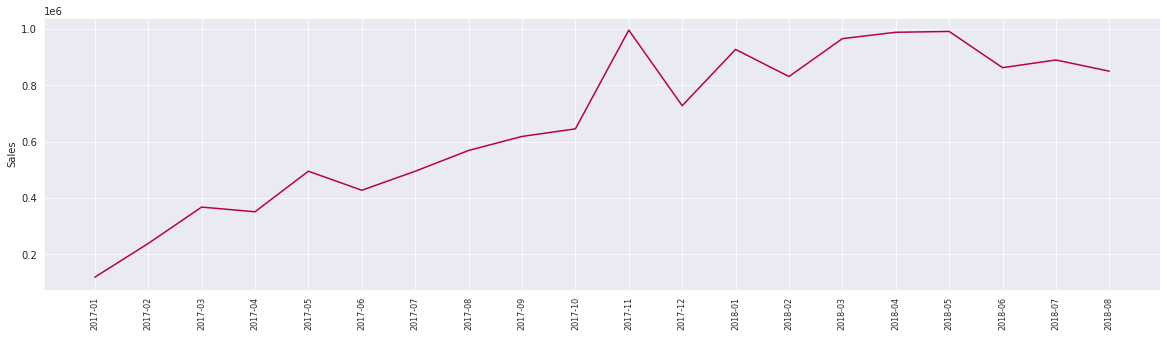

In [84]:
results = olist_order_date.groupby('Month_Year').sum()
months = [month for month, df in olist_order_date.groupby('Month_Year')]
plt.figure(figsize=(20,5))
plt.xticks(ticks = range(len(months)) ,labels = months, rotation='vertical', size = 8)
plt.ylabel('Sales')
plt.plot(months,results['price'], color = '#b80045')
plt.show()

- It is understood that there is increase in trend in the series. ie. Total sales is increasing with time.
- At certain points there is sudden increase in the monthly sales, the reason could be on a particular month, due to some event, the sales was high.

### What is MoM? (Month over month)


In [85]:
MoM_Data = pd.DataFrame(results['price'])
MoM_Data.columns = ['Sales']
MoM_Data.head()

,Sales
Month_Year,
2017-01,118610.23
2017-02,238268.92
2017-03,367630.13
2017-04,350974.16
2017-05,494979.21


In [86]:
MoM_Data['Last_Month'] = np.roll(MoM_Data['Sales'],1)
MoM_Data.head()

,Sales,Last_Month
Month_Year,,
2017-01,118610.23,850209.79
2017-02,238268.92,118610.23
2017-03,367630.13,238268.92
2017-04,350974.16,367630.13
2017-05,494979.21,350974.16


In [87]:
#Now, since the MoM first month cannot be found since we donot have it's previous month value.
#By default, python has put the last value in the column and rolled up over there. SO we need to remove that.
MoM_Data = MoM_Data.drop(MoM_Data.index[0])
MoM_Data.head()

,Sales,Last_Month
Month_Year,,
2017-02,238268.92,118610.23
2017-03,367630.13,238268.92
2017-04,350974.16,367630.13
2017-05,494979.21,350974.16
2017-06,427380.82,494979.21


In [88]:
#Calculating MoM Growth for each month
MoM_Data['Growth'] = (MoM_Data['Sales']/MoM_Data['Last_Month'])-1
MoM_Data.head()

,Sales,Last_Month,Growth
Month_Year,,,
2017-02,238268.92,118610.23,1.008840
2017-03,367630.13,238268.92,0.542921
2017-04,350974.16,367630.13,-0.045306
2017-05,494979.21,350974.16,0.410301
2017-06,427380.82,494979.21,-0.136568


In [89]:
##Plotting MoM Growth
MoM_plot = MoM_Data.drop(columns = ["Sales", "Last_Month"])
MoM_plot['Months'] = MoM_plot.index
MoM_plot.reset_index(drop=True, inplace=True)
MoM_plot.head()

,Growth,Months
0,1.008840,2017-02
1,0.542921,2017-03
2,-0.045306,2017-04
3,0.410301,2017-05
4,-0.136568,2017-06


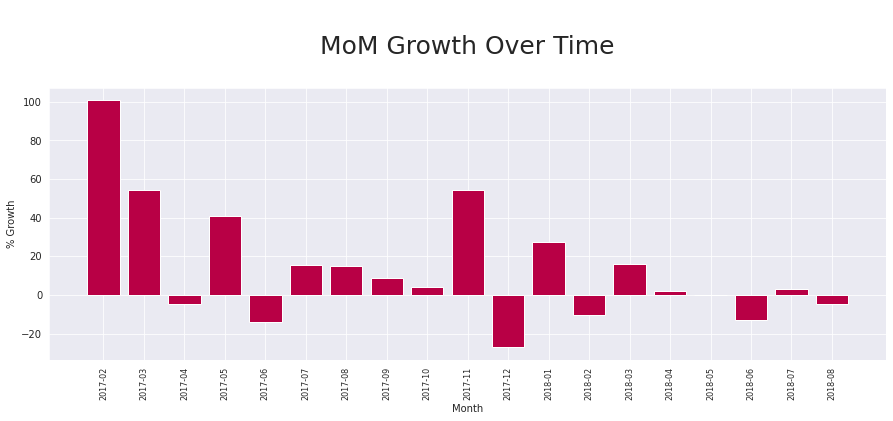

In [90]:
plt.figure(figsize=(15,5))
plt.bar(MoM_plot['Months'],MoM_plot['Growth']*100, color = '#b80045')
plt.xticks(MoM_plot['Months'], rotation='vertical', size = 8)
plt.ylabel('% Growth')
plt.xlabel('Month')
plt.title("\n MoM Growth Over Time \n", size=25)
plt.show()

### Which are the Top 10 products by sales?

In [91]:
olist_prod = olist_products.merge(olist_products_translation,on='product_category_name').drop('product_category_name',1)

In [92]:
olist_prod.head()

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery
2,0d009643171aee696f4733340bc2fdd0,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,49.0,460.0,2.0,267.0,17.0,13.0,17.0,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,56.0,733.0,3.0,377.0,18.0,13.0,15.0,perfumery


In [93]:
prod_sales = pd.DataFrame(olist_order_date.groupby('product_id').sum()['price'])
prod_sales.sort_values(by=['price'], inplace=True, ascending=False)

#Calculating Top 10:
top_prods = prod_sales.head(10)
top_prods.reset_index().merge(olist_prod,on='product_id')[['product_id','price','product_category_name_english']]


,product_id,price,product_category_name_english
0,bb50f2e236e5eea0100680137654686c,63885.00,health_beauty
1,6cdd53843498f92890544667809f1595,54730.20,health_beauty
2,d6160fb7873f184099d9bc95e30376af,48899.34,computers
3,d1c427060a0f73f6b889a5c7c61f2ac4,47214.51,computers_accessories
4,99a4788cb24856965c36a24e339b6058,43025.56,bed_bath_table
5,3dd2a17168ec895c781a9191c1e95ad7,41082.60,computers_accessories
6,25c38557cf793876c5abdd5931f922db,38907.32,baby
7,5f504b3a1c75b73d6151be81eb05bdc9,37733.90,cool_stuff
8,53b36df67ebb7c41585e8d54d6772e08,37683.42,watches_gifts
9,aca2eb7d00ea1a7b8ebd4e68314663af,37608.90,furniture_decor


#### Which month overall has high number of purchases?

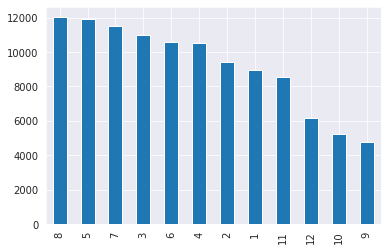

In [94]:
olist_order_date['order_purchase_month'].value_counts().plot(kind='bar');

- Overall sales on the months of 2017 and 2018 says, Sales is more in the months of August and may.


#### Which state has high sales?

In [95]:
cols = ['customer_unique_id','order_id','order_item_id','order_purchase_timestamp','product_id','price','freight_value','product_category_name_english','customer_city','customer_state']
ord_pay[cols]

,customer_unique_id,order_id,order_item_id,order_purchase_timestamp,product_id,price,freight_value,product_category_name_english,customer_city,customer_state
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,1,2017-10-02 10:56:33,87285b34884572647811a353c7ac498a,29.99,8.72,housewares,sao paulo,SP
1,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,1,2017-10-02 10:56:33,87285b34884572647811a353c7ac498a,29.99,8.72,housewares,sao paulo,SP
2,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,1,2017-10-02 10:56:33,87285b34884572647811a353c7ac498a,29.99,8.72,housewares,sao paulo,SP
3,3a51803cc0d012c3b5dc8b7528cb05f7,128e10d95713541c87cd1a2e48201934,1,2017-08-15 18:29:31,87285b34884572647811a353c7ac498a,29.99,7.78,housewares,sao paulo,SP
4,ef0996a1a279c26e7ecbd737be23d235,0e7e841ddf8f8f2de2bad69267ecfbcf,1,2017-08-02 18:24:47,87285b34884572647811a353c7ac498a,29.99,7.78,housewares,sao paulo,SP
...,...,...,...,...,...,...,...,...,...,...
115873,c5da6424f1f5decedef8672a1a0103e1,edcf1e1eeb52381be9388c90152be52d,1,2018-08-21 11:29:05,6bb18295cc019bf3b6dc7c773411d530,289.49,24.83,arts_and_craftmanship,brusque,SC
115874,8c3c961a52bb5a0ffbce1d4e6d25cd67,2c12150c742ae2fa48bc703964c16c5f,1,2018-07-28 17:55:27,2b54fb9a4acf707537eb53eb2458c241,57.90,19.60,arts_and_craftmanship,joao monlevade,MG
115875,428f4721a509be8c52de6ec2900ba918,9f7ba492c273ffac8f90a623b8eadd3b,1,2018-08-23 12:31:37,5aa0d6ed4e6c0995d62090cd82cde89a,11.90,12.79,arts_and_craftmanship,jacarei,SP
115876,8d80e477643ec569b24592ce3d9dfc4c,2ef4a11b6e24fdfbb43b92cb5f95edff,1,2018-07-23 18:35:14,9c313adb4b38a55b092f53f83f78be9e,19.00,12.86,arts_and_craftmanship,diadema,SP


In [96]:
cust_order = ord_pay[cols].drop_duplicates(subset =['order_id','order_item_id','product_id'])
cust_order 

,customer_unique_id,order_id,order_item_id,order_purchase_timestamp,product_id,price,freight_value,product_category_name_english,customer_city,customer_state
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,1,2017-10-02 10:56:33,87285b34884572647811a353c7ac498a,29.99,8.72,housewares,sao paulo,SP
3,3a51803cc0d012c3b5dc8b7528cb05f7,128e10d95713541c87cd1a2e48201934,1,2017-08-15 18:29:31,87285b34884572647811a353c7ac498a,29.99,7.78,housewares,sao paulo,SP
4,ef0996a1a279c26e7ecbd737be23d235,0e7e841ddf8f8f2de2bad69267ecfbcf,1,2017-08-02 18:24:47,87285b34884572647811a353c7ac498a,29.99,7.78,housewares,sao paulo,SP
5,e781fdcc107d13d865fc7698711cc572,bfc39df4f36c3693ff3b63fcbea9e90a,1,2017-10-23 23:26:46,87285b34884572647811a353c7ac498a,29.99,14.10,housewares,florianopolis,SC
6,7a1de9bde89aedca8c5fbad489c5571c,5f49f31e537f8f1a496454b48edbe34d,2,2017-08-24 11:31:28,be03d93320192443b8fa24c0ca6ead98,46.80,67.70,housewares,sao paulo,SP
...,...,...,...,...,...,...,...,...,...,...
115873,c5da6424f1f5decedef8672a1a0103e1,edcf1e1eeb52381be9388c90152be52d,1,2018-08-21 11:29:05,6bb18295cc019bf3b6dc7c773411d530,289.49,24.83,arts_and_craftmanship,brusque,SC
115874,8c3c961a52bb5a0ffbce1d4e6d25cd67,2c12150c742ae2fa48bc703964c16c5f,1,2018-07-28 17:55:27,2b54fb9a4acf707537eb53eb2458c241,57.90,19.60,arts_and_craftmanship,joao monlevade,MG
115875,428f4721a509be8c52de6ec2900ba918,9f7ba492c273ffac8f90a623b8eadd3b,1,2018-08-23 12:31:37,5aa0d6ed4e6c0995d62090cd82cde89a,11.90,12.79,arts_and_craftmanship,jacarei,SP
115876,8d80e477643ec569b24592ce3d9dfc4c,2ef4a11b6e24fdfbb43b92cb5f95edff,1,2018-07-23 18:35:14,9c313adb4b38a55b092f53f83f78be9e,19.00,12.86,arts_and_craftmanship,diadema,SP


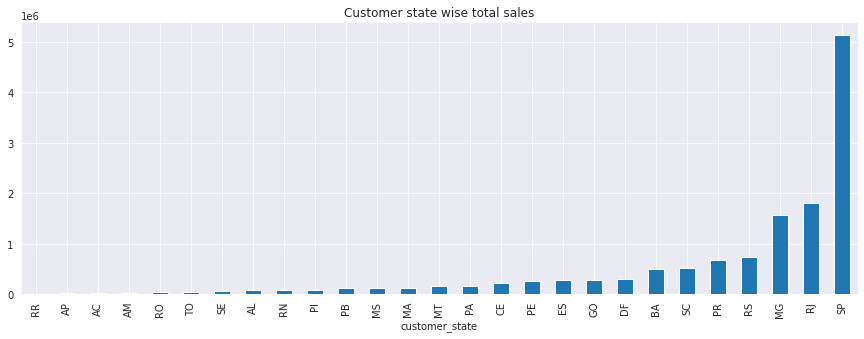

In [97]:
plt.figure(figsize=(15,5))
plt.title('Customer state wise total sales')
cust_order.groupby('customer_state')['price'].sum().sort_values().plot(kind='bar');

### Total Sales for every year

In [98]:
tot_sales_2017 = olist_order_date.groupby(['order_purchase_year'])['price'].sum().loc[2017]
tot_sales_2018 = olist_order_date.groupby(['order_purchase_year'])['price'].sum().loc[2018]
tot_sales_2017,tot_sales_2018

(6049239.710002313, 7307489.200003485)

### Analyse best selling product categories

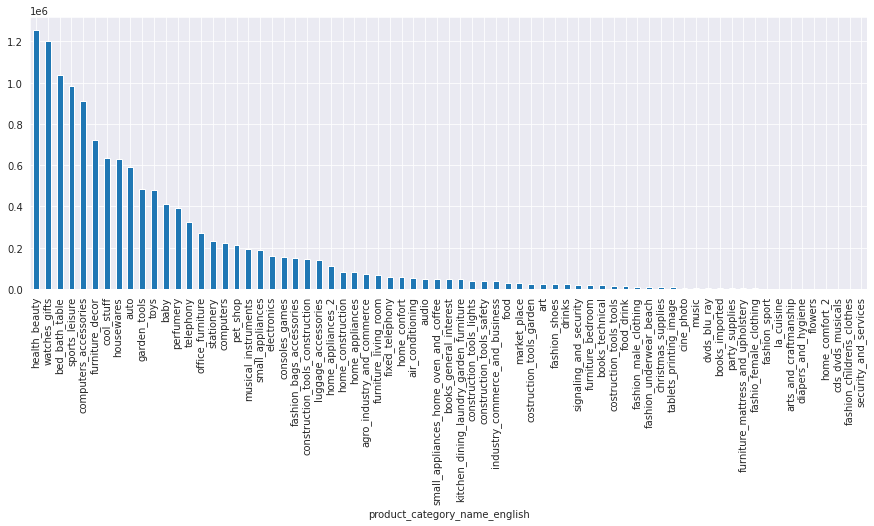

In [99]:
plt.figure(figsize=(15,5))
olist_order_date.groupby('product_category_name_english')['price'].sum().sort_values(ascending=False).plot(kind='bar')

In [100]:
top_15_cat_in_2017_sales = olist_order_date[olist_order_date['order_purchase_year'] == 2017].groupby('product_category_name_english')['price'].sum().sort_values(ascending=False).head(20)
top_15_cat_in_2017_sales

product_category_name_english
bed_bath_table           498440.43
watches_gifts            492794.50
health_beauty            481755.71
sports_leisure           452148.84
computers_accessories    405078.69
cool_stuff               393620.65
furniture_decor          337213.12
toys                     307975.48
garden_tools             268882.71
auto                     243255.71
housewares               231073.49
perfumery                214974.00
computers                159230.79
baby                     153334.03
telephony                142814.64
office_furniture         129009.71
small_appliances         101367.10
stationery                94582.92
consoles_games            88394.45
pet_shop                  85081.70
Name: price, dtype: float64

In [101]:
top_15_cat_in_2018_sales = olist_order_date[olist_order_date['order_purchase_year'] == 2018].groupby('product_category_name_english')['price'].sum().sort_values(ascending=False).head(20)
top_15_cat_in_2018_sales

product_category_name_english
health_beauty                      772238.15
watches_gifts                      708850.94
bed_bath_table                     538069.26
sports_leisure                     532566.49
computers_accessories              505476.31
housewares                         399888.10
furniture_decor                    386668.59
auto                               347631.15
baby                               256800.70
cool_stuff                         240559.20
garden_tools                       215013.87
telephony                          180293.31
perfumery                          178462.17
toys                               171506.03
office_furniture                   143650.11
stationery                         136360.31
pet_shop                           128544.03
construction_tools_construction    124362.31
musical_instruments                109614.95
electronics                        102928.59
Name: price, dtype: float64

In [102]:
df1_2017_cat = pd.DataFrame(top_15_cat_in_2017_sales).reset_index(level=0)
df1_2018_cat = pd.DataFrame(top_15_cat_in_2018_sales).reset_index(level=0)
df_15_cat_sales = df1_2017_cat.merge(df1_2018_cat,on='product_category_name_english',how='outer')
df_15_cat_sales

,product_category_name_english,price_x,price_y
0,bed_bath_table,498440.43,538069.26
1,watches_gifts,492794.50,708850.94
2,health_beauty,481755.71,772238.15
3,sports_leisure,452148.84,532566.49
4,computers_accessories,405078.69,505476.31
5,cool_stuff,393620.65,240559.20
6,furniture_decor,337213.12,386668.59
7,toys,307975.48,171506.03
8,garden_tools,268882.71,215013.87
9,auto,243255.71,347631.15


In [103]:
df_15_cat_sales['sales_add']= df_15_cat_sales['price_x'] + df_15_cat_sales['price_y']
df_15_cat_sales['sales_diff']= df_15_cat_sales['price_y'] - df_15_cat_sales['price_x']
df_15_cat_sales['sales_avg']= (df_15_cat_sales['price_y']+df_15_cat_sales['price_x'])/2
df_15_cat_sales['percent_sales_2017'] = (df_15_cat_sales['price_x']/tot_sales_2017)*100
df_15_cat_sales['percent_sales_2018'] = (df_15_cat_sales['price_y']/tot_sales_2018)*100
df_15_cat_sales['total_percent_sales'] = (df_15_cat_sales['sales_add']/total_sales)*100
df_15_cat_sales

,product_category_name_english,price_x,price_y,sales_add,sales_diff,sales_avg,percent_sales_2017,percent_sales_2018,total_percent_sales
0,bed_bath_table,498440.43,538069.26,1036509.69,39628.83,518254.845,8.239720,7.363258,7.626081
1,watches_gifts,492794.50,708850.94,1201645.44,216056.44,600822.720,8.146387,9.700335,8.841060
2,health_beauty,481755.71,772238.15,1253993.86,290482.44,626996.930,7.963905,10.567763,9.226212
3,sports_leisure,452148.84,532566.49,984715.33,80417.65,492357.665,7.474474,7.287955,7.245005
4,computers_accessories,405078.69,505476.31,910555.00,100397.62,455277.500,6.696357,6.917236,6.699374
5,cool_stuff,393620.65,240559.20,634179.85,-153061.45,317089.925,6.506944,3.291954,4.665954
6,furniture_decor,337213.12,386668.59,723881.71,49455.47,361940.855,5.574471,5.291401,5.325932
7,toys,307975.48,171506.03,479481.51,-136469.45,239740.755,5.091144,2.346990,3.527767
8,garden_tools,268882.71,215013.87,483896.58,-53868.84,241948.290,4.444901,2.942377,3.560251
9,auto,243255.71,347631.15,590886.86,104375.44,295443.430,4.021261,4.757190,4.347428


In [104]:
# Which product category combined makes most sales?
df_15_cat_sales.sort_values('sales_add',ascending=False)

,product_category_name_english,price_x,price_y,sales_add,sales_diff,sales_avg,percent_sales_2017,percent_sales_2018,total_percent_sales
2,health_beauty,481755.71,772238.15,1253993.86,290482.44,626996.930,7.963905,10.567763,9.226212
1,watches_gifts,492794.50,708850.94,1201645.44,216056.44,600822.720,8.146387,9.700335,8.841060
0,bed_bath_table,498440.43,538069.26,1036509.69,39628.83,518254.845,8.239720,7.363258,7.626081
3,sports_leisure,452148.84,532566.49,984715.33,80417.65,492357.665,7.474474,7.287955,7.245005
4,computers_accessories,405078.69,505476.31,910555.00,100397.62,455277.500,6.696357,6.917236,6.699374
6,furniture_decor,337213.12,386668.59,723881.71,49455.47,361940.855,5.574471,5.291401,5.325932
5,cool_stuff,393620.65,240559.20,634179.85,-153061.45,317089.925,6.506944,3.291954,4.665954
10,housewares,231073.49,399888.10,630961.59,168814.61,315480.795,3.819877,5.472305,4.642276
9,auto,243255.71,347631.15,590886.86,104375.44,295443.430,4.021261,4.757190,4.347428
8,garden_tools,268882.71,215013.87,483896.58,-53868.84,241948.290,4.444901,2.942377,3.560251


In [105]:
# Which prod_category's sales has increased the most in the year 2018 compared to 2017?
df_15_cat_sales.sort_values('sales_diff',ascending=False)

,product_category_name_english,price_x,price_y,sales_add,sales_diff,sales_avg,percent_sales_2017,percent_sales_2018,total_percent_sales
2,health_beauty,481755.71,772238.15,1253993.86,290482.44,626996.930,7.963905,10.567763,9.226212
1,watches_gifts,492794.50,708850.94,1201645.44,216056.44,600822.720,8.146387,9.700335,8.841060
10,housewares,231073.49,399888.10,630961.59,168814.61,315480.795,3.819877,5.472305,4.642276
9,auto,243255.71,347631.15,590886.86,104375.44,295443.430,4.021261,4.757190,4.347428
13,baby,153334.03,256800.70,410134.73,103466.67,205067.365,2.534765,3.514213,3.017551
4,computers_accessories,405078.69,505476.31,910555.00,100397.62,455277.500,6.696357,6.917236,6.699374
3,sports_leisure,452148.84,532566.49,984715.33,80417.65,492357.665,7.474474,7.287955,7.245005
6,furniture_decor,337213.12,386668.59,723881.71,49455.47,361940.855,5.574471,5.291401,5.325932
19,pet_shop,85081.70,128544.03,213625.73,43462.33,106812.865,1.406486,1.759072,1.571743
17,stationery,94582.92,136360.31,230943.23,41777.39,115471.615,1.563551,1.866035,1.699156


In [106]:
# Average sales on these two years
(6.049240e+06+7.307489e+06)/2

6678364.5

In [107]:
# Which prod_category's percentage in contributing to total sales is more?
df_15_cat_sales.sort_values('total_percent_sales',ascending=False)

,product_category_name_english,price_x,price_y,sales_add,sales_diff,sales_avg,percent_sales_2017,percent_sales_2018,total_percent_sales
2,health_beauty,481755.71,772238.15,1253993.86,290482.44,626996.930,7.963905,10.567763,9.226212
1,watches_gifts,492794.50,708850.94,1201645.44,216056.44,600822.720,8.146387,9.700335,8.841060
0,bed_bath_table,498440.43,538069.26,1036509.69,39628.83,518254.845,8.239720,7.363258,7.626081
3,sports_leisure,452148.84,532566.49,984715.33,80417.65,492357.665,7.474474,7.287955,7.245005
4,computers_accessories,405078.69,505476.31,910555.00,100397.62,455277.500,6.696357,6.917236,6.699374
6,furniture_decor,337213.12,386668.59,723881.71,49455.47,361940.855,5.574471,5.291401,5.325932
5,cool_stuff,393620.65,240559.20,634179.85,-153061.45,317089.925,6.506944,3.291954,4.665954
10,housewares,231073.49,399888.10,630961.59,168814.61,315480.795,3.819877,5.472305,4.642276
9,auto,243255.71,347631.15,590886.86,104375.44,295443.430,4.021261,4.757190,4.347428
8,garden_tools,268882.71,215013.87,483896.58,-53868.84,241948.290,4.444901,2.942377,3.560251


In [108]:
# Which prod_category's percentage in contributing to total sales in 2018?
df_15_cat_sales.sort_values('percent_sales_2018',ascending=False)

,product_category_name_english,price_x,price_y,sales_add,sales_diff,sales_avg,percent_sales_2017,percent_sales_2018,total_percent_sales
2,health_beauty,481755.71,772238.15,1253993.86,290482.44,626996.930,7.963905,10.567763,9.226212
1,watches_gifts,492794.50,708850.94,1201645.44,216056.44,600822.720,8.146387,9.700335,8.841060
0,bed_bath_table,498440.43,538069.26,1036509.69,39628.83,518254.845,8.239720,7.363258,7.626081
3,sports_leisure,452148.84,532566.49,984715.33,80417.65,492357.665,7.474474,7.287955,7.245005
4,computers_accessories,405078.69,505476.31,910555.00,100397.62,455277.500,6.696357,6.917236,6.699374
10,housewares,231073.49,399888.10,630961.59,168814.61,315480.795,3.819877,5.472305,4.642276
6,furniture_decor,337213.12,386668.59,723881.71,49455.47,361940.855,5.574471,5.291401,5.325932
9,auto,243255.71,347631.15,590886.86,104375.44,295443.430,4.021261,4.757190,4.347428
13,baby,153334.03,256800.70,410134.73,103466.67,205067.365,2.534765,3.514213,3.017551
5,cool_stuff,393620.65,240559.20,634179.85,-153061.45,317089.925,6.506944,3.291954,4.665954


#### Year-Week-wise sales for two years 2017 and 2018

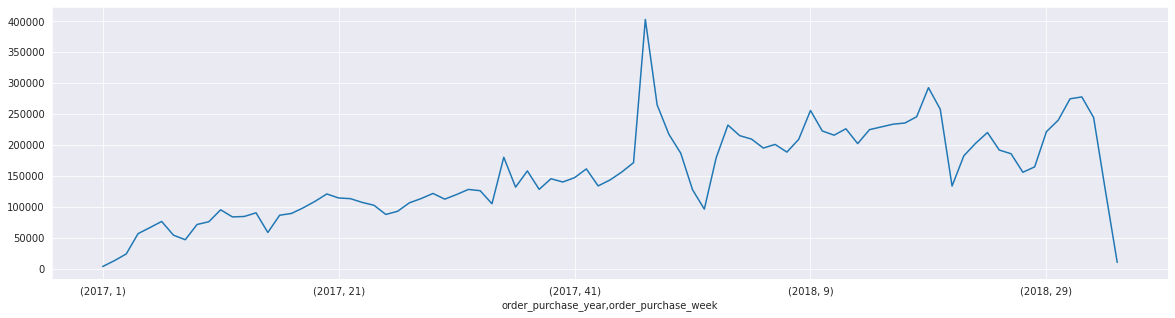

In [109]:
plt.figure(figsize=(20,5))
olist_order_date.groupby(['order_purchase_year','order_purchase_week'])['price'].sum().plot();

### Week-wise sales for two years 2017 and 2018

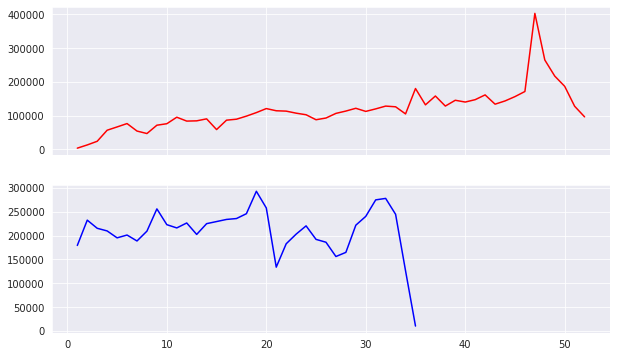

In [110]:
fig, (ax1,ax2) = plt.subplots(nrows=2, sharex=True,figsize=(10,6)) 
ax1.plot(olist_order_date[olist_order_date['Month_Year'].apply(lambda x: x < '2018-01')].groupby(['order_purchase_week'])['price'].sum(), color='r')
ax2.plot(olist_order_date[olist_order_date['Month_Year'].apply(lambda x: x >= '2018-01')].groupby(['order_purchase_week'])['price'].sum(), color='b')
plt.show()

### Monthly sales for the year 2017 and 2018

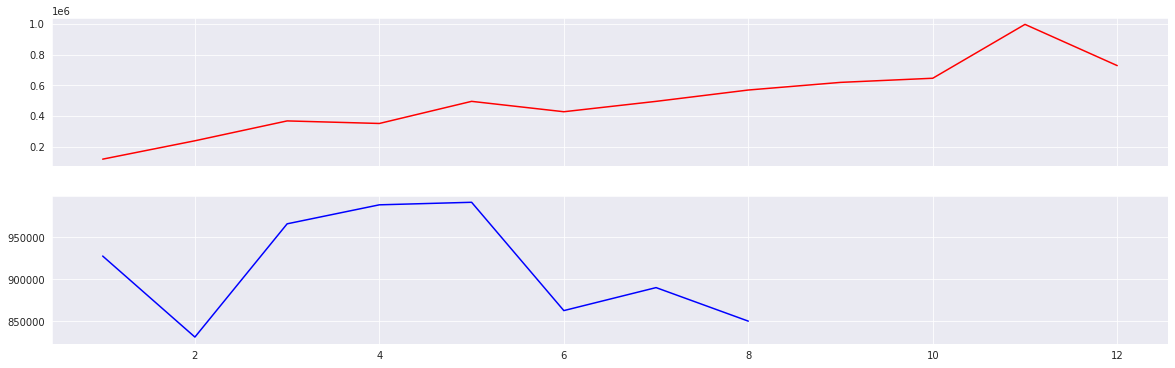

In [111]:
fig, (ax1,ax2) = plt.subplots(nrows=2, sharex=True,figsize=(20,6)) 
ax1.plot(olist_order_date[olist_order_date['Month_Year'].apply(lambda x: x < '2018-01')].groupby(['order_purchase_month'])['price'].sum(), color='r')
ax2.plot(olist_order_date[olist_order_date['Month_Year'].apply(lambda x: x >= '2018-01')].groupby(['order_purchase_month'])['price'].sum(), color='b')
plt.show()

### day wise sales till the month 8 for the year 2017 and 2018

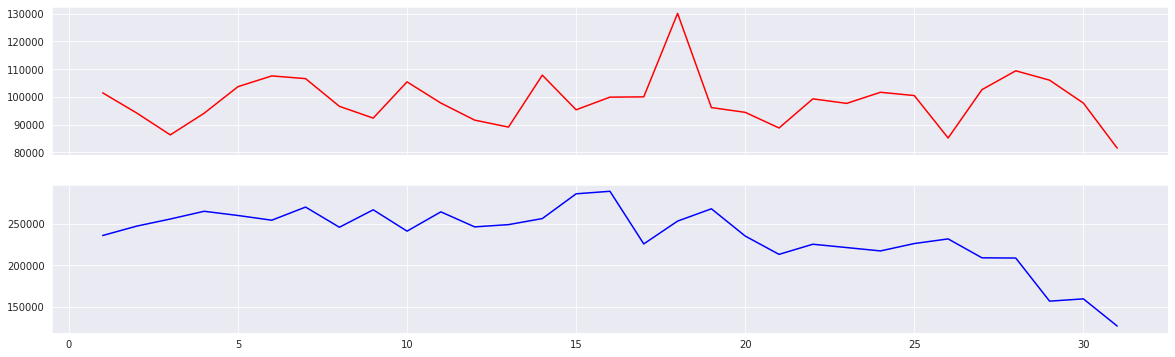

In [112]:
fig, (ax1,ax2) = plt.subplots(nrows=2, sharex=True,figsize=(20,6)) 
ax1.plot(olist_order_date[olist_order_date['Month_Year'].apply(lambda x: x <= '2017-08')].groupby(['order_purchase_day'])['price'].sum(), color='r')
ax2.plot(olist_order_date[olist_order_date['Month_Year'].apply(lambda x: x >= '2018-01')].groupby(['order_purchase_day'])['price'].sum(), color='b')
plt.show()

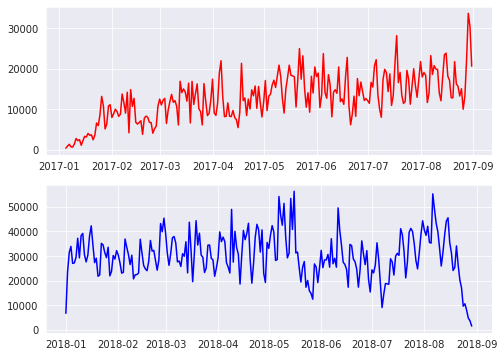

In [113]:
fig, (ax1,ax2) = plt.subplots(nrows=2,figsize=(8,6)) 
ax1.plot(olist_order_date[olist_order_date['Month_Year'].apply(lambda x: x <= '2017-08')].groupby(['order_purchase_date'])['price'].sum(), color='r')
ax2.plot(olist_order_date[olist_order_date['Month_Year'].apply(lambda x: x >= '2018-01')].groupby(['order_purchase_date'])['price'].sum(), color='b')
plt.show()

In [114]:
# Dropping nan values 
df_15_cat_sales = df_15_cat_sales.dropna().head(10)
df_15_cat_sales

,product_category_name_english,price_x,price_y,sales_add,sales_diff,sales_avg,percent_sales_2017,percent_sales_2018,total_percent_sales
0,bed_bath_table,498440.43,538069.26,1036509.69,39628.83,518254.845,8.239720,7.363258,7.626081
1,watches_gifts,492794.50,708850.94,1201645.44,216056.44,600822.720,8.146387,9.700335,8.841060
2,health_beauty,481755.71,772238.15,1253993.86,290482.44,626996.930,7.963905,10.567763,9.226212
3,sports_leisure,452148.84,532566.49,984715.33,80417.65,492357.665,7.474474,7.287955,7.245005
4,computers_accessories,405078.69,505476.31,910555.00,100397.62,455277.500,6.696357,6.917236,6.699374
5,cool_stuff,393620.65,240559.20,634179.85,-153061.45,317089.925,6.506944,3.291954,4.665954
6,furniture_decor,337213.12,386668.59,723881.71,49455.47,361940.855,5.574471,5.291401,5.325932
7,toys,307975.48,171506.03,479481.51,-136469.45,239740.755,5.091144,2.346990,3.527767
8,garden_tools,268882.71,215013.87,483896.58,-53868.84,241948.290,4.444901,2.942377,3.560251
9,auto,243255.71,347631.15,590886.86,104375.44,295443.430,4.021261,4.757190,4.347428


In [115]:
olist_order_data_cat = olist_order_date[olist_order_date['product_category_name_english'].isin(df_15_cat_sales['product_category_name_english'])]
olist_order_data_cat.head()

,level_0,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,order_purchase_timestamp,order_purchase_year,order_purchase_month,order_purchase_date,order_purchase_day,order_purchase_week,order_purchase_hour,Month_Year,product_category_name_english
0,0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,2017-09-13 08:59:02,2017,9,2017-09-13,13,37,8,2017-09,cool_stuff
1,1,1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,2017-06-28 11:52:20,2017,6,2017-06-28,28,26,11,2017-06,cool_stuff
2,2,2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,2018-05-18 10:25:53,2018,5,2018-05-18,18,20,10,2018-05,cool_stuff
3,3,3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,2017-08-01 18:38:42,2017,8,2017-08-01,1,31,18,2017-08,cool_stuff
4,4,4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,2017-08-10 21:48:40,2017,8,2017-08-10,10,32,21,2017-08,cool_stuff


### Month wise plot for the above selected categories

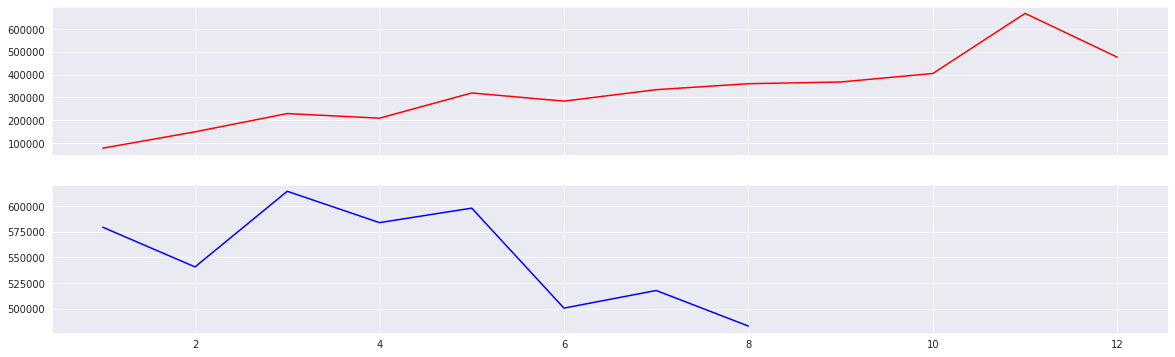

In [116]:
fig, (ax1,ax2) = plt.subplots(nrows=2, sharex=True,figsize=(20,6)) 
ax1.plot(olist_order_data_cat[olist_order_data_cat['Month_Year'].apply(lambda x: x < '2018-01')].groupby(['order_purchase_month'])['price'].sum(), color='r')
ax2.plot(olist_order_data_cat[olist_order_data_cat['Month_Year'].apply(lambda x: x >= '2018-01')].groupby(['order_purchase_month'])['price'].sum(), color='b')
plt.show()

### Week-wise sales for the above selected categories

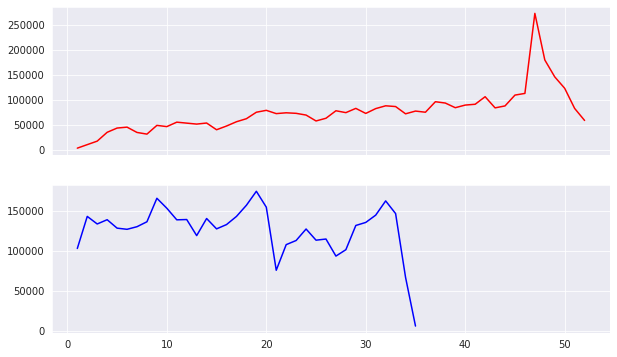

In [117]:
fig, (ax1,ax2) = plt.subplots(nrows=2, sharex=True,figsize=(10,6)) 
ax1.plot(olist_order_data_cat[olist_order_data_cat['Month_Year'].apply(lambda x: x < '2018-01')].groupby(['order_purchase_week'])['price'].sum(), color='r')
ax2.plot(olist_order_data_cat[olist_order_data_cat['Month_Year'].apply(lambda x: x >= '2018-01')].groupby(['order_purchase_week'])['price'].sum(), color='b')
plt.show()

### day wise sales till the month 8 for the above selected product categories

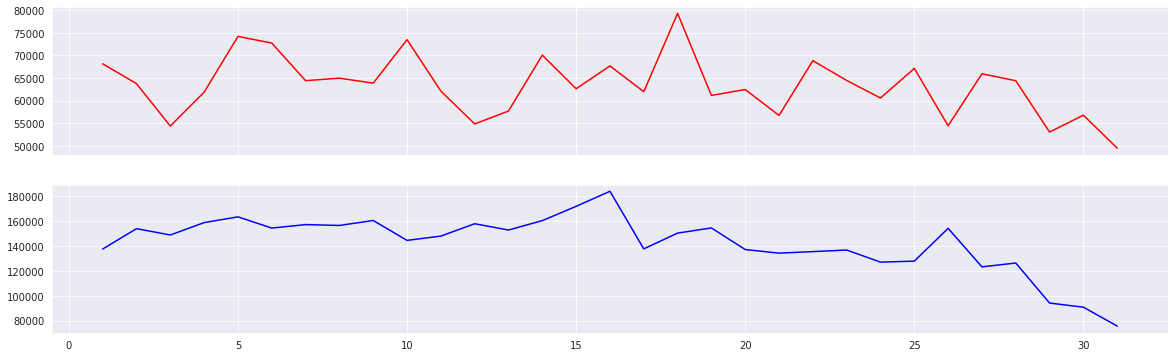

In [118]:
fig, (ax1,ax2) = plt.subplots(nrows=2, sharex=True,figsize=(20,6)) 
ax1.plot(olist_order_data_cat[olist_order_data_cat['Month_Year'].apply(lambda x: x <= '2017-08')].groupby(['order_purchase_day'])['price'].sum(), color='r')
ax2.plot(olist_order_data_cat[olist_order_data_cat['Month_Year'].apply(lambda x: x >= '2018-01')].groupby(['order_purchase_day'])['price'].sum(), color='b')
plt.show()

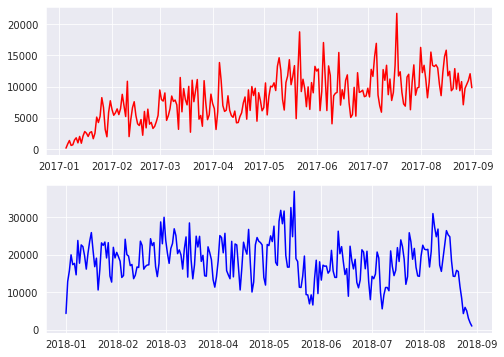

In [119]:
fig, (ax1,ax2) = plt.subplots(nrows=2,figsize=(8,6)) 
ax1.plot(olist_order_data_cat[olist_order_data_cat['Month_Year'].apply(lambda x: x <= '2017-08')].groupby(['order_purchase_date'])['price'].sum(), color='r')
ax2.plot(olist_order_data_cat[olist_order_data_cat['Month_Year'].apply(lambda x: x >= '2018-01')].groupby(['order_purchase_date'])['price'].sum(), color='b')
plt.show()

In [120]:
train = olist_order_data_cat[olist_order_data_cat['Month_Year'].apply(lambda x: x < '2018-08')].sort_values('order_purchase_timestamp').reset_index(drop=True).drop(['level_0','index'],1)

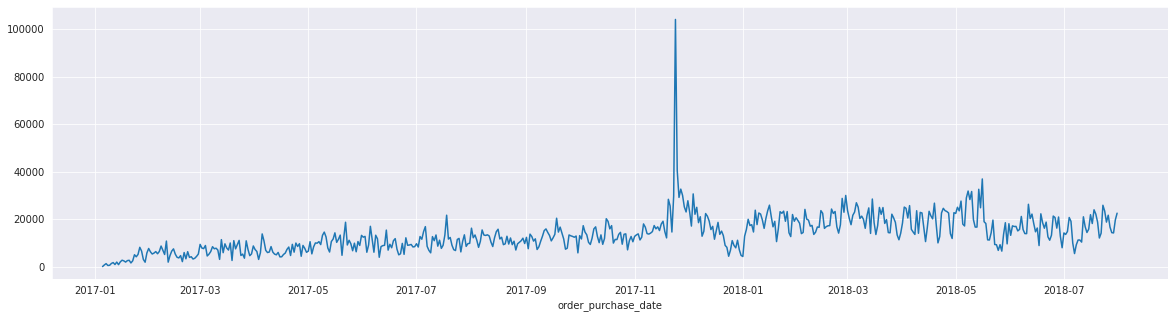

In [121]:
plt.figure(figsize=(20,5))
train.groupby('order_purchase_date')['price'].sum().plot()

### The overall sales trend?

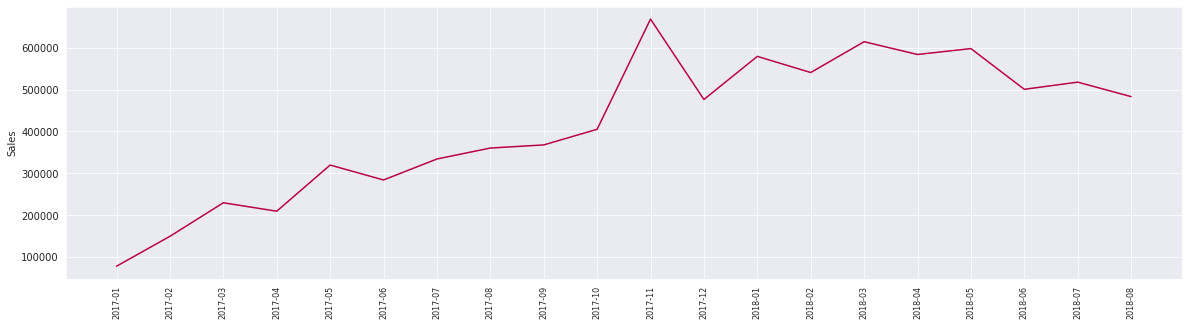

In [122]:
results = olist_order_data_cat.groupby('Month_Year').sum()
months = [month for month, df in olist_order_data_cat.groupby('Month_Year')]
plt.figure(figsize=(20,5))
plt.xticks(ticks = range(len(months)) ,labels = months, rotation='vertical', size = 8)
plt.ylabel('Sales')
plt.plot(months,results['price'], color = '#b80045')
plt.show()

- It is understood that there is increase in trend in the series. ie. Total sales is increasing with time.
- At certain points there is sudden increase in the monthly sales, the reason could be on a particular month, due to some event, the sales was high.